# Mobile Device Machine Learning Model 📱

In [1]:
## importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from colorama import Fore, Back, Style 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix

In [2]:
## reading the data
train_df = pd.read_csv('train.csv')
train_df.head()

,Unnamed: 0,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,Taken_product
0,10381,396,1,22159,21,4,1,89,5505,0,1,28,1,4,0,16,0
1,322,240,1,35630,1,4,7,74,5055,7,0,16,0,3,0,10,0
2,6296,289,0,52160,2,2,0,47,1713,1,1,31,1,3,1,1,0
3,6162,227,0,15482,2,2,0,47,4559,1,0,30,0,1,0,10,0
4,5799,234,1,39424,1,3,3,61,5059,2,0,30,1,2,0,16,0


In [3]:
train_df.drop(columns={'Unnamed: 0'},inplace=True)

In [4]:
train_df.shape

(4461, 16)

In the main notebook we have labelled `Mobile` as **1** and `Laptop` as **0**

In [5]:
## selecting only those rows that have preferred device as 1
train_df = train_df[train_df['preferred_device']==1]

In [6]:
train_df.preferred_device.value_counts()

preferred_device
1    3897
Name: count, dtype: int64

In [7]:
## we can now drop 'preferred_device' column
train_df.drop(columns={'preferred_device'},inplace=True)
train_df.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,Taken_product
0,396,22159,21,4,1,89,5505,0,1,28,1,4,0,16,0
1,240,35630,1,4,7,74,5055,7,0,16,0,3,0,10,0
4,234,39424,1,3,3,61,5059,2,0,30,1,2,0,16,0
5,270,38675,24,4,3,47,5674,7,0,15,0,3,1,11,0
6,324,48064,1,3,11,95,5403,9,0,19,0,2,0,9,1


In [8]:
train_df.shape

(3897, 15)

In [9]:
## X and y attributes
X_train = train_df.drop(columns={'Taken_product'})
y_train = train_df['Taken_product']

### Test data

In [10]:
test_df = pd.read_csv('test.csv')
test_df.drop(columns={'Unnamed: 0'},inplace=True)
test_df = test_df[test_df['preferred_device']==1]

In [11]:
test_df.head()

,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,Taken_product
0,212,1,48200,11,1,0,102,2103,0,0,20,0,2,0,6,0
1,350,1,5254,2,4,14,67,7382,2,0,21,0,3,1,12,0
2,268,1,52188,11,4,6,60,2719,8,1,32,0,3,1,8,0
3,236,1,24407,10,3,6,44,11042,4,0,30,1,3,1,13,0
4,249,1,28503,14,3,7,72,2482,5,1,25,0,3,1,13,1


In [12]:
test_df.drop(columns={'preferred_device'},inplace=True)

In [13]:
test_df.shape

(1695, 15)

In [14]:
## X and y attributes
X_test = test_df.drop(['Taken_product'],axis=1)
y_test = test_df['Taken_product']

## Model Building

In [15]:
accuracy_list = []

In [16]:
## scaling the values of some features
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### 1. Random forest 🌳🌲🌳

In [17]:
r_clf = RandomForestClassifier(max_features=0.7,max_depth=20, random_state=40)
r_clf.fit(X_train, y_train)
r_pred = r_clf.predict(X_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)

In [18]:
print(Fore.GREEN + "Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))

Accuracy of Random Forest Classifier is :  97.94%


<Figure size 640x480 with 0 Axes>

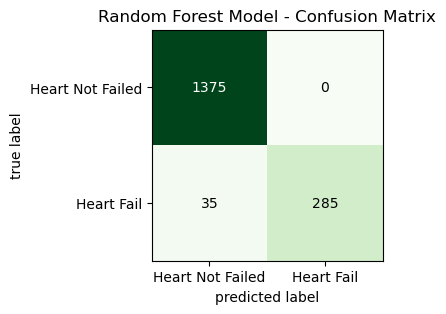

In [19]:
cm = confusion_matrix(y_test, r_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(3,3), hide_ticks=True, cmap=plt.cm.Greens)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=10)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=10)
plt.show();

In [20]:
print(classification_report(y_test,r_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1375
           1       1.00      0.89      0.94       320

    accuracy                           0.98      1695
   macro avg       0.99      0.95      0.96      1695
weighted avg       0.98      0.98      0.98      1695



### 2. Logistic regression

In [21]:
log_reg = LogisticRegression(max_iter=100)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)

In [22]:
print(Fore.BLUE + "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

Accuracy of Logistic Regression is :  84.01%


<Figure size 640x480 with 0 Axes>

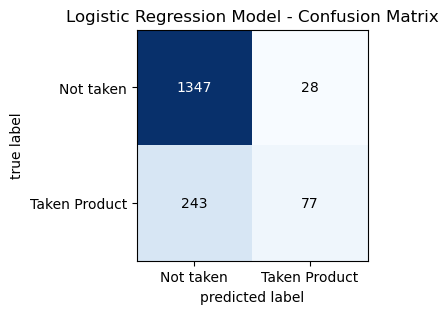

In [23]:
cm = confusion_matrix(y_test, log_reg_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(3,3), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Not taken","Taken Product"], fontsize=10)
plt.yticks(range(2), ["Not taken","Taken Product"], fontsize=10)
plt.show();

In [24]:
print(classification_report(y_test,log_reg_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1375
           1       0.73      0.24      0.36       320

    accuracy                           0.84      1695
   macro avg       0.79      0.61      0.64      1695
weighted avg       0.83      0.84      0.81      1695



### 3. Support Vector

In [25]:
sv_clf = SVC()
sv_clf.fit(X_train, y_train)
sv_clf_pred = sv_clf.predict(X_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100* sv_clf_acc)

In [26]:
print(Fore.RED + "Accuracy of SVC is : ", "{:.2f}%".format(100* sv_clf_acc))

Accuracy of SVC is :  87.43%


<Figure size 640x480 with 0 Axes>

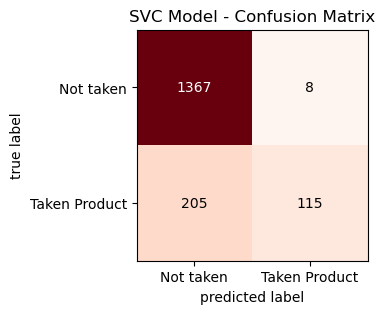

In [27]:
cm = confusion_matrix(y_test, sv_clf_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(3,3), hide_ticks=True, cmap=plt.cm.Reds)
plt.title("SVC Model - Confusion Matrix")
plt.xticks(range(2), ["Not taken","Taken Product"], fontsize=10)
plt.yticks(range(2), ["Not taken","Taken Product"], fontsize=10)
plt.show()

In [28]:
print(classification_report(y_test,sv_clf_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1375
           1       0.93      0.36      0.52       320

    accuracy                           0.87      1695
   macro avg       0.90      0.68      0.72      1695
weighted avg       0.88      0.87      0.85      1695



### 4. Decision Tree

In [29]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)

In [30]:
print(Fore.GREEN + "Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))

Accuracy of Decision Tree Classifier is :  82.48%


<Figure size 640x480 with 0 Axes>

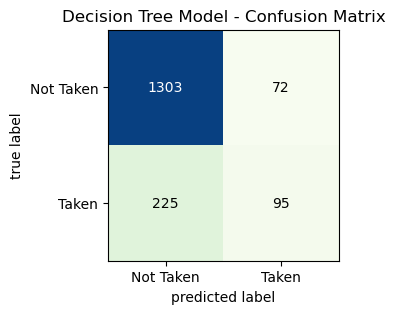

In [31]:
cm = confusion_matrix(y_test, dt_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(3,3), hide_ticks=True, cmap=plt.cm.GnBu)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.yticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.show()

In [32]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1375
           1       0.57      0.30      0.39       320

    accuracy                           0.82      1695
   macro avg       0.71      0.62      0.64      1695
weighted avg       0.80      0.82      0.80      1695



### 5. KNN Classifier

In [33]:
kn_clf = KNeighborsClassifier(n_neighbors=5)
kn_clf.fit(X_train, y_train)
kn_pred = kn_clf.predict(X_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)

C:\Users\srshu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [34]:
print(Fore.YELLOW + "Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_acc))

Accuracy of K Neighbors Classifier is :  92.98%


<Figure size 640x480 with 0 Axes>

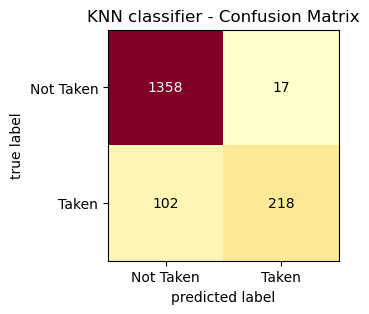

In [35]:
cm = confusion_matrix(y_test, kn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(3,3), hide_ticks=True, cmap=plt.cm.YlOrRd)
plt.title("KNN classifier - Confusion Matrix")
plt.xticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.yticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.show();

In [36]:
print(classification_report(y_test,kn_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1375
           1       0.93      0.68      0.79       320

    accuracy                           0.93      1695
   macro avg       0.93      0.83      0.87      1695
weighted avg       0.93      0.93      0.93      1695



### 6. Gradient Boosting

In [37]:
gb_clf = GradientBoostingClassifier(max_depth=10, random_state=50)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
accuracy_list.append(100*gb_acc)

In [38]:
print(Fore.LIGHTCYAN_EX + "Accuracy of Gradient Boosting is : ", "{:.2f}%".format(100* gb_acc))

Accuracy of Gradient Boosting is :  98.05%


<Figure size 640x480 with 0 Axes>

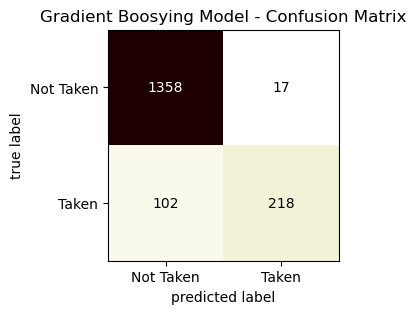

In [39]:
## confusion_matrix
m = confusion_matrix(y_test, gb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(3,3), hide_ticks=True, cmap=plt.cm.pink_r)
plt.title("Gradient Boosying Model - Confusion Matrix")
plt.xticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.yticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.show()

In [40]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1375
           1       0.99      0.91      0.95       320

    accuracy                           0.98      1695
   macro avg       0.98      0.95      0.97      1695
weighted avg       0.98      0.98      0.98      1695



### 7. xgbrf Clasifier

In [41]:
xgb_clf = xgb.XGBRFClassifier(max_depth=20, random_state=50)
xgb_clf.fit(X_train,y_train)
xgb_pred = xgb_clf.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
accuracy_list.append(100*xgb_acc)

In [42]:
print(Fore.LIGHTMAGENTA_EX + "Accuracy of XGBRFClassifier is : ", "{:.2f}%".format(100* xgb_acc))

Accuracy of XGBRFClassifier is :  96.87%


<Figure size 640x480 with 0 Axes>

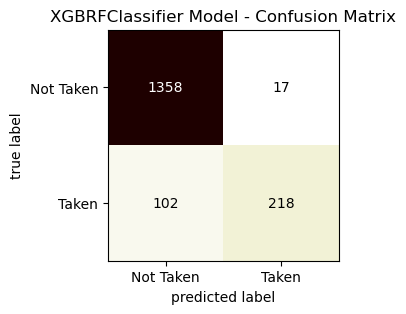

In [43]:
m = confusion_matrix(y_test, xgb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(3,3), hide_ticks=True, cmap=plt.cm.pink_r)
plt.title("XGBRFClassifier Model - Confusion Matrix")
plt.xticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.yticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.show()

In [44]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1375
           1       0.99      0.84      0.91       320

    accuracy                           0.97      1695
   macro avg       0.98      0.92      0.95      1695
weighted avg       0.97      0.97      0.97      1695



### 8. CatBoost Classifier

In [45]:
cat_clf = CatBoostClassifier()
cat_clf.fit(X_train,y_train)
cat_pred = cat_clf.predict(X_test)
cat_acc = accuracy_score(y_test, cat_pred)
accuracy_list.append(100*cat_acc)

Learning rate set to 0.018415
0:	learn: 0.6769835	total: 145ms	remaining: 2m 24s
1:	learn: 0.6617145	total: 151ms	remaining: 1m 15s
2:	learn: 0.6477786	total: 158ms	remaining: 52.5s
3:	learn: 0.6339260	total: 164ms	remaining: 40.8s
4:	learn: 0.6227927	total: 168ms	remaining: 33.5s
5:	learn: 0.6109670	total: 175ms	remaining: 28.9s
6:	learn: 0.5983815	total: 180ms	remaining: 25.5s
7:	learn: 0.5876031	total: 185ms	remaining: 23s
8:	learn: 0.5773621	total: 192ms	remaining: 21.1s
9:	learn: 0.5673586	total: 197ms	remaining: 19.5s
10:	learn: 0.5581690	total: 200ms	remaining: 18s
11:	learn: 0.5483964	total: 203ms	remaining: 16.7s
12:	learn: 0.5403846	total: 207ms	remaining: 15.7s
13:	learn: 0.5315841	total: 210ms	remaining: 14.8s
14:	learn: 0.5245169	total: 212ms	remaining: 13.9s
15:	learn: 0.5178708	total: 214ms	remaining: 13.2s
16:	learn: 0.5103717	total: 216ms	remaining: 12.5s
17:	learn: 0.5013798	total: 218ms	remaining: 11.9s
18:	learn: 0.4952222	total: 220ms	remaining: 11.3s
19:	learn: 0.

175:	learn: 0.2525513	total: 536ms	remaining: 2.51s
176:	learn: 0.2516853	total: 538ms	remaining: 2.5s
177:	learn: 0.2512818	total: 540ms	remaining: 2.5s
178:	learn: 0.2505600	total: 543ms	remaining: 2.49s
179:	learn: 0.2500443	total: 545ms	remaining: 2.48s
180:	learn: 0.2496893	total: 547ms	remaining: 2.48s
181:	learn: 0.2488026	total: 550ms	remaining: 2.47s
182:	learn: 0.2481652	total: 552ms	remaining: 2.46s
183:	learn: 0.2476160	total: 554ms	remaining: 2.46s
184:	learn: 0.2468087	total: 556ms	remaining: 2.45s
185:	learn: 0.2461304	total: 558ms	remaining: 2.44s
186:	learn: 0.2452796	total: 560ms	remaining: 2.44s
187:	learn: 0.2444506	total: 562ms	remaining: 2.43s
188:	learn: 0.2438741	total: 564ms	remaining: 2.42s
189:	learn: 0.2435147	total: 566ms	remaining: 2.41s
190:	learn: 0.2428462	total: 568ms	remaining: 2.41s
191:	learn: 0.2423819	total: 570ms	remaining: 2.4s
192:	learn: 0.2419081	total: 572ms	remaining: 2.39s
193:	learn: 0.2414208	total: 574ms	remaining: 2.38s
194:	learn: 0.2

371:	learn: 0.1713573	total: 934ms	remaining: 1.58s
372:	learn: 0.1711463	total: 936ms	remaining: 1.57s
373:	learn: 0.1709715	total: 938ms	remaining: 1.57s
374:	learn: 0.1707466	total: 940ms	remaining: 1.57s
375:	learn: 0.1705835	total: 942ms	remaining: 1.56s
376:	learn: 0.1702290	total: 944ms	remaining: 1.56s
377:	learn: 0.1697406	total: 946ms	remaining: 1.55s
378:	learn: 0.1693761	total: 948ms	remaining: 1.55s
379:	learn: 0.1690442	total: 950ms	remaining: 1.55s
380:	learn: 0.1686680	total: 952ms	remaining: 1.55s
381:	learn: 0.1683715	total: 954ms	remaining: 1.54s
382:	learn: 0.1681745	total: 956ms	remaining: 1.54s
383:	learn: 0.1679383	total: 958ms	remaining: 1.54s
384:	learn: 0.1676266	total: 960ms	remaining: 1.53s
385:	learn: 0.1671586	total: 963ms	remaining: 1.53s
386:	learn: 0.1670569	total: 965ms	remaining: 1.53s
387:	learn: 0.1667351	total: 967ms	remaining: 1.52s
388:	learn: 0.1662615	total: 969ms	remaining: 1.52s
389:	learn: 0.1660886	total: 971ms	remaining: 1.52s
390:	learn: 

540:	learn: 0.1267977	total: 1.32s	remaining: 1.12s
541:	learn: 0.1266716	total: 1.32s	remaining: 1.12s
542:	learn: 0.1265456	total: 1.33s	remaining: 1.12s
543:	learn: 0.1263185	total: 1.33s	remaining: 1.12s
544:	learn: 0.1261041	total: 1.33s	remaining: 1.11s
545:	learn: 0.1259427	total: 1.34s	remaining: 1.11s
546:	learn: 0.1258272	total: 1.34s	remaining: 1.11s
547:	learn: 0.1256772	total: 1.34s	remaining: 1.11s
548:	learn: 0.1254599	total: 1.35s	remaining: 1.11s
549:	learn: 0.1252330	total: 1.35s	remaining: 1.11s
550:	learn: 0.1250951	total: 1.35s	remaining: 1.1s
551:	learn: 0.1248231	total: 1.36s	remaining: 1.1s
552:	learn: 0.1246984	total: 1.36s	remaining: 1.1s
553:	learn: 0.1245620	total: 1.36s	remaining: 1.1s
554:	learn: 0.1243243	total: 1.37s	remaining: 1.1s
555:	learn: 0.1240776	total: 1.37s	remaining: 1.1s
556:	learn: 0.1239569	total: 1.38s	remaining: 1.09s
557:	learn: 0.1237324	total: 1.38s	remaining: 1.09s
558:	learn: 0.1235543	total: 1.38s	remaining: 1.09s
559:	learn: 0.1233

715:	learn: 0.0966619	total: 1.93s	remaining: 766ms
716:	learn: 0.0965363	total: 1.93s	remaining: 763ms
717:	learn: 0.0964914	total: 1.94s	remaining: 761ms
718:	learn: 0.0963756	total: 1.94s	remaining: 758ms
719:	learn: 0.0961808	total: 1.94s	remaining: 756ms
720:	learn: 0.0961312	total: 1.95s	remaining: 754ms
721:	learn: 0.0959785	total: 1.95s	remaining: 751ms
722:	learn: 0.0958537	total: 1.95s	remaining: 749ms
723:	learn: 0.0957286	total: 1.96s	remaining: 746ms
724:	learn: 0.0956001	total: 1.96s	remaining: 744ms
725:	learn: 0.0954722	total: 1.96s	remaining: 742ms
726:	learn: 0.0953699	total: 1.97s	remaining: 739ms
727:	learn: 0.0952017	total: 1.97s	remaining: 737ms
728:	learn: 0.0950022	total: 1.98s	remaining: 734ms
729:	learn: 0.0948814	total: 1.98s	remaining: 732ms
730:	learn: 0.0947519	total: 1.98s	remaining: 730ms
731:	learn: 0.0945740	total: 1.99s	remaining: 727ms
732:	learn: 0.0943856	total: 1.99s	remaining: 725ms
733:	learn: 0.0942493	total: 1.99s	remaining: 722ms
734:	learn: 

888:	learn: 0.0758636	total: 2.53s	remaining: 316ms
889:	learn: 0.0757801	total: 2.54s	remaining: 314ms
890:	learn: 0.0756766	total: 2.54s	remaining: 311ms
891:	learn: 0.0755536	total: 2.54s	remaining: 308ms
892:	learn: 0.0754337	total: 2.55s	remaining: 305ms
893:	learn: 0.0753292	total: 2.55s	remaining: 302ms
894:	learn: 0.0752016	total: 2.55s	remaining: 300ms
895:	learn: 0.0750802	total: 2.56s	remaining: 297ms
896:	learn: 0.0749704	total: 2.56s	remaining: 294ms
897:	learn: 0.0749023	total: 2.56s	remaining: 291ms
898:	learn: 0.0746717	total: 2.57s	remaining: 288ms
899:	learn: 0.0745184	total: 2.57s	remaining: 286ms
900:	learn: 0.0744179	total: 2.57s	remaining: 283ms
901:	learn: 0.0743565	total: 2.58s	remaining: 280ms
902:	learn: 0.0742597	total: 2.58s	remaining: 277ms
903:	learn: 0.0742015	total: 2.58s	remaining: 275ms
904:	learn: 0.0741004	total: 2.59s	remaining: 272ms
905:	learn: 0.0740476	total: 2.59s	remaining: 269ms
906:	learn: 0.0739715	total: 2.6s	remaining: 266ms
907:	learn: 0

In [46]:
print(Fore.GREEN + "Accuracy of CatBoostClassifier is : ","{:.2f}%".format(100* cat_acc))

Accuracy of CatBoostClassifier is :  96.76%


<Figure size 640x480 with 0 Axes>

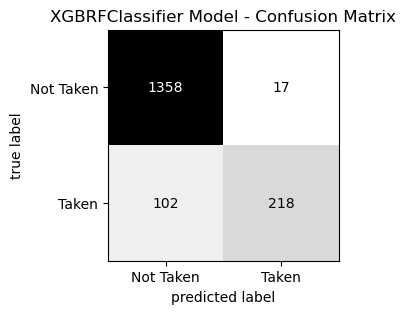

In [47]:
m = confusion_matrix(y_test, cat_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(3,3), hide_ticks=True, cmap=plt.cm.gray_r)
plt.title("XGBRFClassifier Model - Confusion Matrix")
plt.xticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.yticks(range(2), ["Not Taken","Taken"], fontsize=10)
plt.show()

In [48]:
print(classification_report(y_test,cat_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1375
           1       1.00      0.83      0.91       320

    accuracy                           0.97      1695
   macro avg       0.98      0.92      0.94      1695
weighted avg       0.97      0.97      0.97      1695



In [49]:
model_list = ['Random Forest','Logistic regression','SVM','Decision Tree','KNN Classifier','Gradient Boosting',
              'xgbrf Clasifier','Cat Boost Classifier']

In [50]:
accuracy_list

[97.93510324483776,
 84.0117994100295,
 87.43362831858407,
 82.47787610619469,
 92.97935103244838,
 98.05309734513274,
 96.87315634218288,
 96.7551622418879]

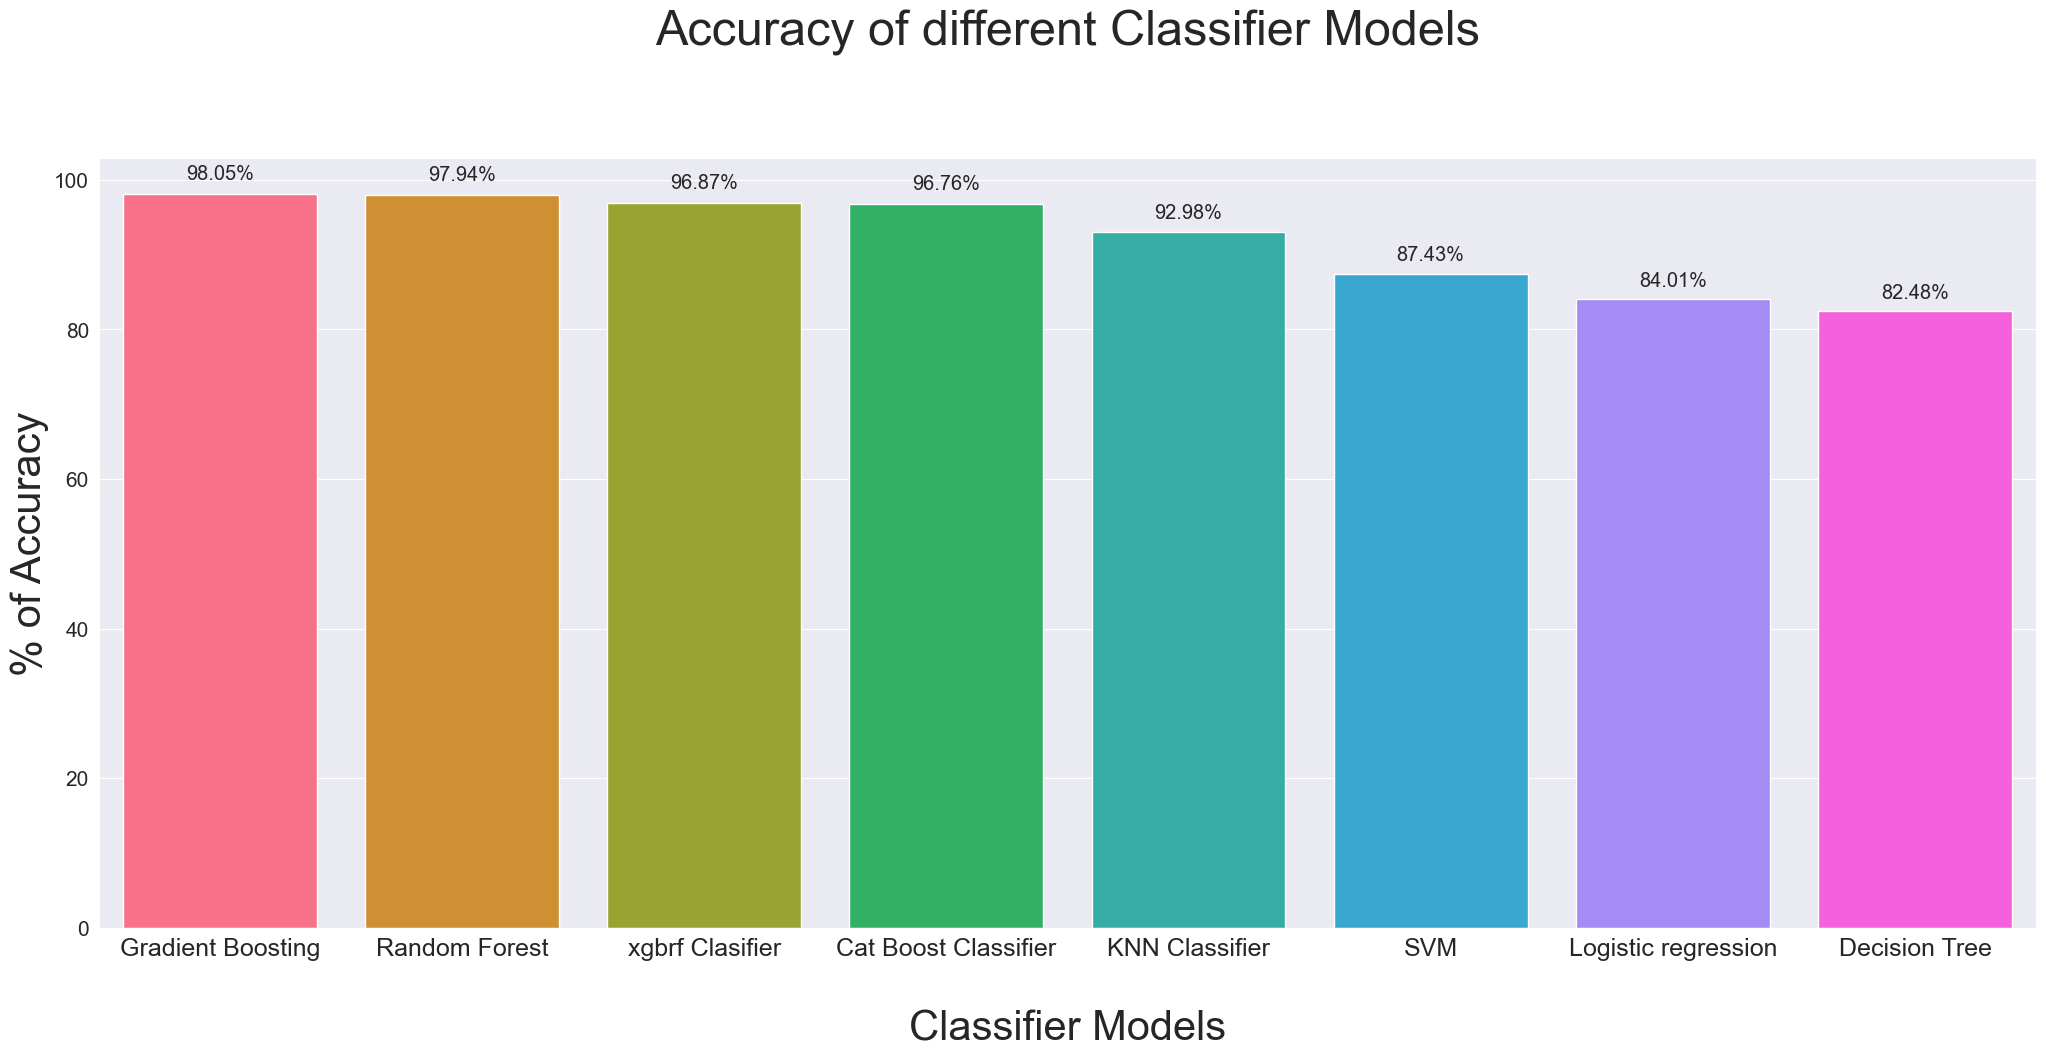

In [51]:
plt.rcParams['figure.figsize']=25,10
sns.set_style('darkgrid')

# Sort the data in descending order
sorted_indices = sorted(range(len(accuracy_list)), key=lambda k: accuracy_list[k], reverse=True)
sorted_model_list = [model_list[i] for i in sorted_indices]
sorted_accuracy_list = [accuracy_list[i] for i in sorted_indices]

ax = sns.barplot(x=sorted_model_list, y=sorted_accuracy_list, palette = "husl", saturation=2.0)
plt.xlabel('\nClassifier Models', fontsize = 30 )
plt.ylabel('% of Accuracy', fontsize = 30)
plt.title('Accuracy of different Classifier Models\n\n', fontsize = 35)
plt.xticks(fontsize = 18, horizontalalignment = 'center', rotation =0)
plt.yticks(fontsize = 15)

for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

## Model Accuracy

* Gradient Boosting - 98.05%
* Random Forest - 97.94%
* xgbrf Clasifier - 96.87%
* Cat Boost Classifier - 96.76%
* KNN Classifier - 92.98%
* SVM - 87.43%
* Logistic regression - 84.48%
* Decision Tree - 82.48%

## Conclusion:

* Some of the models performed better after scaling down the values using **StandardScaler()** but some models showed a decrease in its accuracy.